<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Proyecto Final**

Jairo Salazar

Carnet : 21000887 

***Parte I - Analisis exploratorio de Datos***


 

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd





In [133]:
#carga de dataset y slicin de los datos
def slicingDataset (ds,inicio,porcentaje):
  cantidad = int(np.round(ds.shape[0] * porcentaje,0))
  return ds[inicio:inicio+cantidad,0:6]
  


Dataset = np.load('proyecto_training_data.npy')
print (Dataset.shape)
dsEntrenamiento = slicingDataset(Dataset,0,0.80)
dsTest = slicingDataset(Dataset,int(dsEntrenamiento.shape[0])-1,0.20)
print (dsTest.shape)
print (dsEntrenamiento.shape)


(1460, 6)
(292, 6)
(1168, 6)


(1168, 6)
(1168, 1)
-------------------------------
       Precio de Venta
Media:  180590.27739726027
Valor Maximo:  755000.0
Valor Minimo:  34900.0
Rango:  720100.0
Desviacion Standard:  78781.95108033362
-------------------------------
       Overall Quality
Media:  6.101027397260274
Valor Maximo:  10.0
Valor Minimo:  1.0
Rango:  9.0
Desviacion Standard:  1.377435193240741
-------------------------------
       1st Floor SFT
Media:  1156.3236301369864
Valor Maximo:  3228.0
Valor Minimo:  334.0
Rango:  2894.0
Desviacion Standard:  373.620331503586
-------------------------------
       Total Rooms above grade
Media:  6.4854452054794525
Valor Maximo:  14.0
Valor Minimo:  2.0
Rango:  12.0
Desviacion Standard:  1.6084517167387253
-------------------------------
       Years Built
Media:  1971.451198630137
Valor Maximo:  2010.0
Valor Minimo:  1875.0
Rango:  135.0
Desviacion Standard:  29.93888206867768
-------------------------------
       Lot Frontage
Media:  69.94698544698545
Valor Max

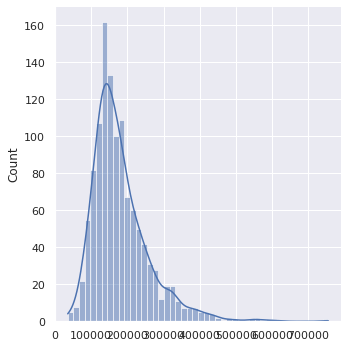

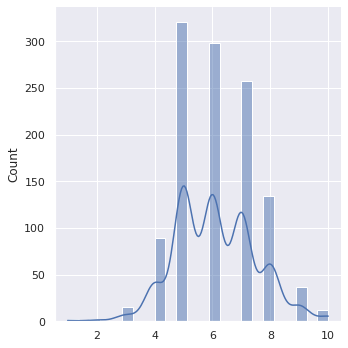

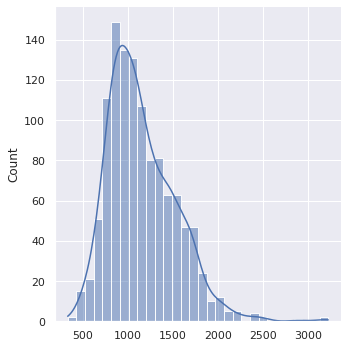

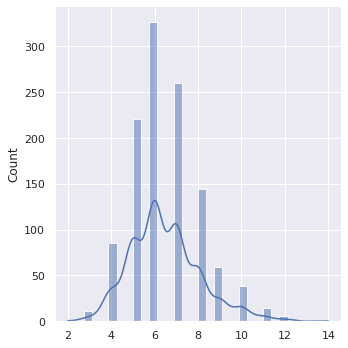

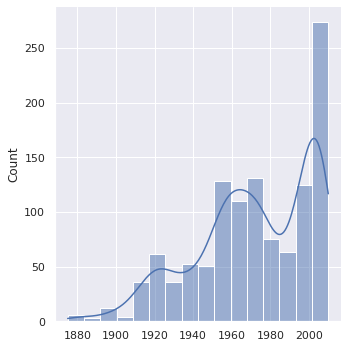

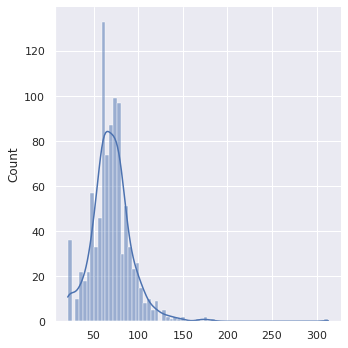

In [137]:
#Analisis Exploratorio de los datasets
#calculando media, valor maximo, valor minimo, rango, desviacion estandard.
def dimensiones (ds,columna,nombre):
 
  dimension = ds[0:ds.shape[0],columna-1:columna]
  #correl = np.corrcoef(precio,dimension)
  dimension = dimension[np.logical_not(np.isnan(dimension))]
  media = np.mean(dimension)
  valmax = np.max(dimension)
  valmin = np.min(dimension)
  desvstd  = np.std(dimension)
  rango    = np.ptp(dimension)

  print('-------------------------------')
  print('      ', nombre)
  print ('Media: ',media)
  print ('Valor Maximo: ',valmax)
  print ('Valor Minimo: ',valmin)
  print ('Rango: ',rango)
  print ('Desviacion Standard: ',desvstd)
  #print ('Correlacion: ',correl)
  sb.set_theme()
  #print(dimension.shape)
  sb.displot(dimension,kde=True)
 


preciocasas = dsEntrenamiento[0:dsEntrenamiento.shape[0],0:1]
print(dsEntrenamiento.shape)
print(preciocasas.shape)
dimensiones(dsEntrenamiento,1,"Precio de Venta")
dimensiones(dsEntrenamiento,2,"Overall Quality")
dimensiones(dsEntrenamiento,3,"1st Floor SFT")
dimensiones(dsEntrenamiento,4,"Total Rooms above grade")
dimensiones(dsEntrenamiento,5,"Years Built")
dimensiones(dsEntrenamiento,6,"Lot Frontage")

***Correlacion de los datos***

A continuacion encontrara la correlacion entre las diferentes cualidades de las propiedades y el precio. 

Encontrara primero cada grafico de correlacion siendo x = Precio y Y = cualquiera de las otras 5 variables del set de datos.  

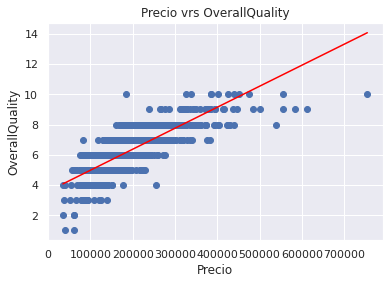

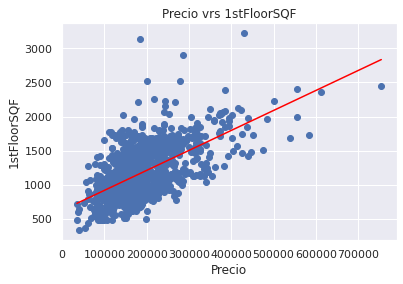

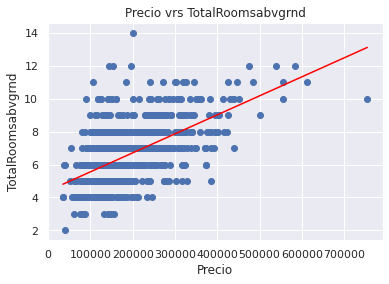

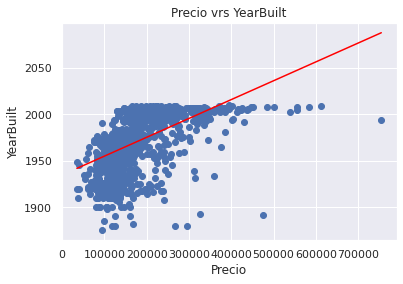

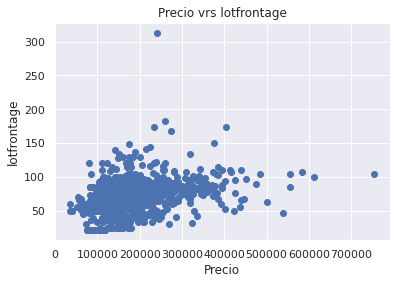

                     precio  OverallQuality  ...  YearBuilt  lotfrontage
precio             1.000000        0.793990  ...   0.534171     0.363292
OverallQuality     0.793990        1.000000  ...   0.567313     0.242420
1stFloorSQF        0.616289        0.469411  ...   0.292074     0.417388
TotalRoomsabvgrnd  0.564707        0.444293  ...   0.122911     0.341005
YearBuilt          0.534171        0.567313  ...   1.000000     0.121474
lotfrontage        0.363292        0.242420  ...   0.121474     1.000000

[6 rows x 6 columns]


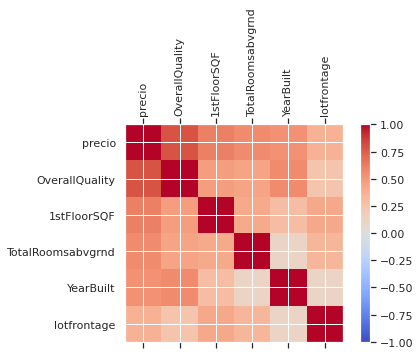

In [177]:
def GraficarCorrelacion (x,y,titulo,xtitulo,ytitulo,color1):
  plt.scatter(x,y)
  plt.title(titulo)
  plt.xlabel(xtitulo)
  plt.ylabel(ytitulo)
  plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color=color1)
  plt.show()



dsPanda = pd.DataFrame(data=dsEntrenamiento,columns=["precio","OverallQuality","1stFloorSQF","TotalRoomsabvgrnd","YearBuilt","lotfrontage"])
dsPanda.head()

x = dsPanda['precio']
y = dsPanda['OverallQuality']

GraficarCorrelacion(x,y,'Precio vrs OverallQuality','Precio','OverallQuality','red')

y = dsPanda['1stFloorSQF']
GraficarCorrelacion(x,y,'Precio vrs 1stFloorSQF','Precio','1stFloorSQF','red')

y = dsPanda['TotalRoomsabvgrnd']
GraficarCorrelacion(x,y,'Precio vrs TotalRoomsabvgrnd','Precio','TotalRoomsabvgrnd','red')

y = dsPanda['YearBuilt']
GraficarCorrelacion(x,y,'Precio vrs YearBuilt','Precio','YearBuilt','red')

y = dsPanda['lotfrontage']
GraficarCorrelacion(x,y,'Precio vrs lotfrontage','Precio','lotfrontage','red')

corr = dsPanda.corr(method="pearson")
print(corr)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(dsPanda.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(dsPanda.columns)
ax.set_yticklabels(dsPanda.columns)
plt.show()


#preciocasas = dsEntrenamiento[0:dsEntrenamiento.shape[0],0:1]
#ovq = dsEntrenamiento[0:dsEntrenamiento.shape[0],1:2]

#np.corrcoef(preciocasas,ovq)
#np.corrcoef(preciocasas,ovq)




